In [6]:
file1 = "st23_muon_520_10000eve.root" 
file2 = "st23_electron_520_10000eve.root" 
file3 = "st23_pi-_520_10000eve.root" 
file4 = "st23_kaon_520_1000eve.root" 
file5 = "st23_muon_900_1000eve.root" 
file6 = "st23_electron_900_1000eve.root" 
file7 = "st23_pi-_900_1000eve.root"
file8 = "st23_kaon_900_1000eve.root"

In [7]:
# import libraries
import uproot3 as uproot
import uproot as uproot4
import numpy as np
import numba
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
#import pandas as pd
from scipy.stats import halfnorm
from sklearn.cluster import KMeans
import random
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from lmfit import Model
import copy
#import ROOT
#from coffea import hist

In [8]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Tracks":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "truthtrack_x_st3":   kn_dict_ak1["truthtrack_x_st3"],
                                        "truthtrack_y_st3":   kn_dict_ak1["truthtrack_y_st3"],
                                        "truthtrack_z_st3":   kn_dict_ak1["truthtrack_z_st3"],
                                        "truthtrack_x_st1":   kn_dict_ak1["truthtrack_x_st1"],
                                        "truthtrack_y_st1":   kn_dict_ak1["truthtrack_y_st1"],
                                        "truthtrack_z_st1":   kn_dict_ak1["truthtrack_z_st1"],
                                        "truthtrack_x_vtx":   kn_dict_ak1["truthtrack_x_vtx"],
                                        "truthtrack_y_vtx":   kn_dict_ak1["truthtrack_y_vtx"],
                                        "truthtrack_z_vtx":   kn_dict_ak1["truthtrack_z_vtx"],
                                      }),
                        "RecoTracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "track_x_CAL":   kn_dict_ak1["track_x_CAL"],
                                        "track_y_CAL":   kn_dict_ak1["track_y_CAL"],
                                        "track_pz":      kn_dict_ak1["track_pz_st3"],
                                        "track_px":      kn_dict_ak1["track_px_st3"],
                                        "track_py":      kn_dict_ak1["track_py_st3"],
                                        "track_x_st3":      kn_dict_ak1["track_x_st3"],
                                        "track_y_st3":      kn_dict_ak1["track_y_st3"],
                                        "track_z_st3":      kn_dict_ak1["track_z_st3"]
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                            "gvx":      kn_dict_ak1["gvx"],
                                            "gvy":      kn_dict_ak1["gvy"],
                                            "gvz":      kn_dict_ak1["gvz"],
                                            "gpx":      kn_dict_ak1["gpx"],
                                            "gpy":      kn_dict_ak1["gpy"],
                                            "gpz":      kn_dict_ak1["gpz"],
                                        }),
                        "Hits":ak.zip({
                                      "detID":   kn_dict_ak1["hit_detID"],
                                      "edep":    kn_dict_ak1["hit_edep"],
                                      "elmID":   kn_dict_ak1["hit_elmID"],
                                      "truthx":  kn_dict_ak1["hit_truthx"],
                                      "truthy":  kn_dict_ak1["hit_truthy"],
                                      "truthz":  kn_dict_ak1["hit_truthz"],
                                      "hit_pos":  kn_dict_ak1["hit_pos"],
                                      }),
                        "Cal_Position":ak.zip({
                                            "track_x_CAL":      kn_dict_ak1["track_x_CAL"],
                                            "track_y_CAL":     kn_dict_ak1["track_y_CAL"],
                                        }),
                        "St23_Tracklet":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "st23tracklet_nhits_st1":   kn_dict_ak1["st23tracklet_nhits_st1"],
                                        "st23tracklet_nhits_st2":   kn_dict_ak1["st23tracklet_nhits_st2"],
                                        "st23tracklet_nhits_st3":   kn_dict_ak1["st23tracklet_nhits_st3"],
                                        "st23tracklet_px_st1":   kn_dict_ak1["st23tracklet_px_st1"],
                                        "st23tracklet_px_st3":   kn_dict_ak1["st23tracklet_px_st3"],
                                        "st23tracklet_py_st1":   kn_dict_ak1["st23tracklet_py_st1"],
                                        "st23tracklet_py_st3":   kn_dict_ak1["st23tracklet_py_st3"],
                                        "st23tracklet_pz_st1":   kn_dict_ak1["st23tracklet_pz_st1"],
                                        "st23tracklet_pz_st3":   kn_dict_ak1["st23tracklet_pz_st3"],
                                        "st23tracklet_x_st1":   kn_dict_ak1["st23tracklet_x_st1"],
                                        "st23tracklet_x_st3":   kn_dict_ak1["st23tracklet_x_st3"],
                                        "st23tracklet_x_CAL":   kn_dict_ak1["st23tracklet_x_CAL"],
                                        "st23tracklet_y_st1":   kn_dict_ak1["st23tracklet_y_st1"],
                                        "st23tracklet_y_st3":   kn_dict_ak1["st23tracklet_y_st3"],
                                        "st23tracklet_y_CAL":   kn_dict_ak1["st23tracklet_y_CAL"],
                                        "st23tracklet_z_st1":   kn_dict_ak1["st23tracklet_z_st1"],
                                        "st23tracklet_z_st3":   kn_dict_ak1["st23tracklet_z_st3"],  
                                        }),
                    
                       }, depth_limit=1)
    return kn_events

In [14]:
events_muon_520 = getData(file1,"Events")
events_electron_520 = getData(file2,"Events")
events_pion_520 = getData(file3,"Events")
#events_kaon_520 = getData(file4,"Events")

events_muon_900 = getData(file5,"Events")
events_electron_900 = getData(file6,"Events")
#events_pion_900 = getData(file7,"Events")
#events_kaon_900 = getData(file8,"Events")

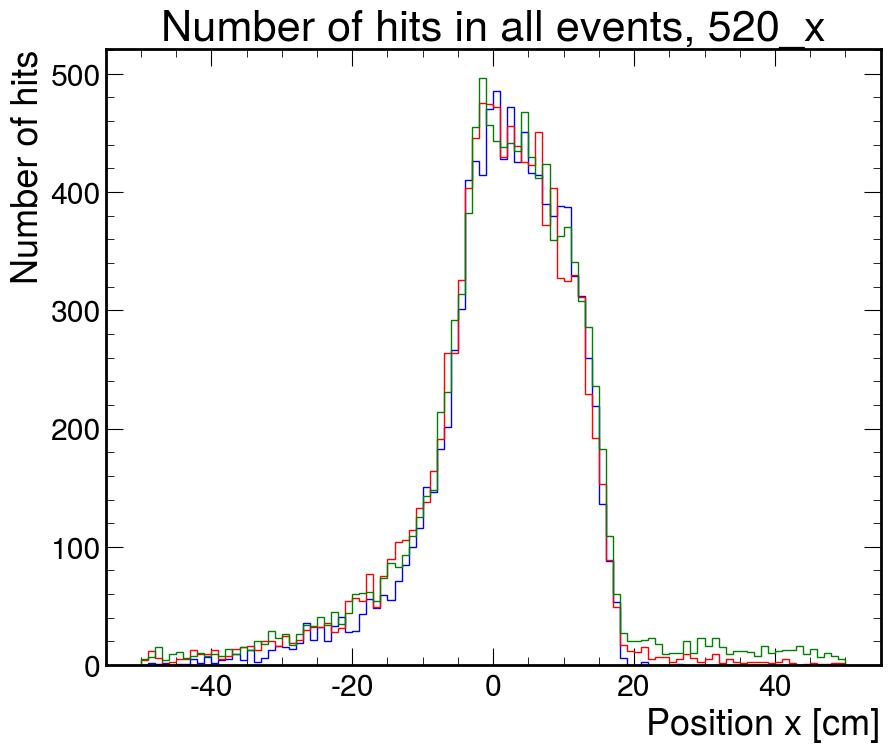

In [16]:
CAL_x_1 = ak.flatten(events_muon_520['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_2 = ak.flatten(events_electron_520['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_3 = ak.flatten(events_pion_520['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_4 = ak.flatten(events_kaon_520['St23_Tracklet'].st23tracklet_x_CAL)


fig = plt.figure(figsize=(10,8))
plt.hist(CAL_x_1, bins=100, range=(-50,50), histtype='step', density=False, color="blue")
plt.hist(CAL_x_2, bins=100, range=(-50,50), histtype='step', density=False, color="red")
plt.hist(CAL_x_3, bins=100, range=(-50,50), histtype='step', density=False, color="green")
plt.hist(CAL_x_4, bins=100, range=(-50,50), histtype='step', density=False, color="black")
plt.ylabel("Number of hits")
plt.xlabel("Position x [cm]")
plt.title("Number of hits in all events, 520_x")
plt.savefig("Number of hits in all events, 520_x.png")
plt.show()

In [10]:
CAL_y_1 = ak.flatten(events_muon_520['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_2 = ak.flatten(events_electron_520['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_3 = ak.flatten(events_pion_520['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_4 = ak.flatten(events_kaon_520['St23_Tracklet'].st23tracklet_y_CAL)


fig = plt.figure(figsize=(10,8))
plt.hist(CAL_y_1, bins=100, range=(-50,50), histtype='step', density=False, color="blue")
plt.hist(CAL_y_2, bins=100, range=(-50,50), histtype='step', density=False, color="red")
plt.hist(CAL_y_3, bins=100, range=(-50,50), histtype='step', density=False, color="green")
plt.hist(CAL_y_4, bins=100, range=(-50,50), histtype='step', density=False, color="black")
plt.ylabel("Number of hits")
plt.xlabel("Position y [cm]")
plt.title("Number of hits in all events, 520_y")
plt.savefig("Number of hits in all events, 520_y.png")
plt.show()

NameError: name 'events_kaon_520' is not defined

In [11]:
CAL_x_5 = ak.flatten(events_muon_900['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_6 = ak.flatten(events_electron_900['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_7 = ak.flatten(events_pion_900['St23_Tracklet'].st23tracklet_x_CAL)
CAL_x_8 = ak.flatten(events_kaon_900['St23_Tracklet'].st23tracklet_x_CAL)


fig = plt.figure(figsize=(10,8))
plt.hist(CAL_x_5, bins=100, range=(-50,50), histtype='step', density=False, color="blue")
plt.hist(CAL_x_6, bins=100, range=(-50,50), histtype='step', density=False, color="red")
plt.hist(CAL_x_7, bins=100, range=(-50,50), histtype='step', density=False, color="green")
plt.hist(CAL_x_8, bins=100, range=(-50,50), histtype='step', density=False, color="black")
plt.ylabel("Number of hits")
plt.xlabel("Position x [cm]")
plt.title("Number of hits in all events, 900_x")
plt.rcParams["figure.figsize"] = (10,8)
plt.show()
plt.savefig("Number of hits in all events, 900_x.png")


NameError: name 'events_muon_900' is not defined

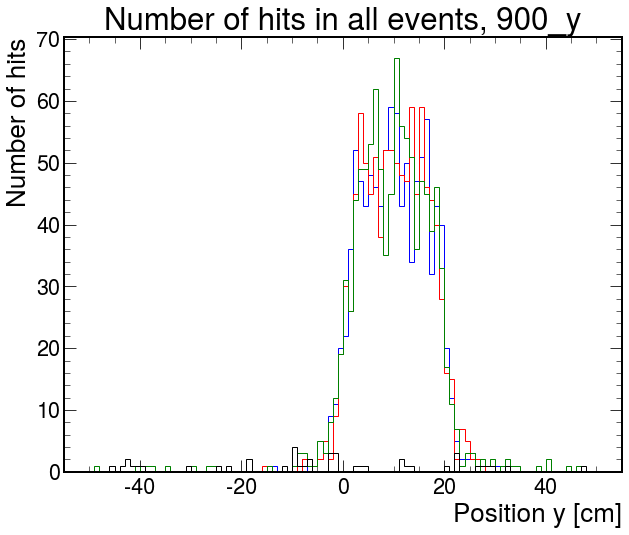

In [25]:
CAL_y_5 = ak.flatten(events_muon_900['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_6 = ak.flatten(events_electron_900['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_7 = ak.flatten(events_pion_900['St23_Tracklet'].st23tracklet_y_CAL)
CAL_y_8 = ak.flatten(events_kaon_900['St23_Tracklet'].st23tracklet_y_CAL)


fig = plt.figure(figsize=(10,8))
plt.hist(CAL_y_5, bins=100, range=(-50,50), histtype='step', density=False, color="blue")
plt.hist(CAL_y_6, bins=100, range=(-50,50), histtype='step', density=False, color="red")
plt.hist(CAL_y_7, bins=100, range=(-50,50), histtype='step', density=False, color="green")
plt.hist(CAL_y_8, bins=100, range=(-50,50), histtype='step', density=False, color="black")
plt.ylabel("Number of hits")
plt.xlabel("Position y [cm]")
plt.title("Number of hits in all events, 900_y")
plt.savefig("Number of hits in all events, 900_y.png")

plt.show()

In [19]:
print(type(CAL_x_2))

<class 'awkward.highlevel.Array'>
